## Fan fiction based on Harry Potter

In [1]:
import requests
import re
import os
import string
from os.path import join
from nltk import word_tokenize,sent_tokenize,pos_tag
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

First, the code downloads the full texts of the books in the Harry Potter series.

In [2]:
hp_urls = [
"https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Sorcerer's%20Stone.txt",
'https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Chamber%20of%20Secrets.txt',
'https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Prisoner%20of%20Azkaban%20.txt',
'https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Goblet%20of%20Fire.txt',
'https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Order%20of%20the%20Phoenix.txt',
'https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Deathly%20Hallows%20.txt',
'https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20The%20Half-Blood%20Prince.txt'
]

The folder 'Fanfiction' contains the ten works inspired y Harry Potter books which have received the highest number of Kudos on [Archive of Our Own](https://archiveofourown.org/) 

In [3]:
dir = 'HP'

if not os.path.exists(dir):
    os.makedirs(dir)

for url in hp_urls:
    response = requests.get(url)
    if response:
        out_file = os.path.basename(url).strip()
        out_file = re.sub('Harry%20Potter%20and%20the%20','',out_file)
        with open(join(dir,out_file),'w',encoding='utf-8') as out:
            out.write(response.text)
            print(f'{out_file} downloaded ...')
        

Sorcerer's%20Stone.txt downloaded ...
Chamber%20of%20Secrets.txt downloaded ...
Prisoner%20of%20Azkaban%20.txt downloaded ...
Goblet%20of%20Fire.txt downloaded ...
Order%20of%20the%20Phoenix.txt downloaded ...
Deathly%20Hallows%20.txt downloaded ...
Harry%20Potter%20and%20The%20Half-Blood%20Prince.txt downloaded ...


In [4]:
metadata = dict()
corpus = []

dir = 'HP'
for file in os.listdir(dir):
    if re.search('\.txt$',file):
        path = join(dir,file)
        metadata[path] = 'Original'
        corpus.append(path)
        
dir = 'Fanfiction'        
for file in os.listdir('Fanfiction'):
    if re.search('\.txt$',file):
        path = join(dir,file)
        metadata[path] = 'Fanfiction'
        corpus.append(path)

For each text, the number of tokens, the number of sentences,  he number of characters and the type-token ratio is calculated. 

In [5]:
data = []

string.punctuation += '-•“”’– '


for file in corpus:
    print(f'Analysing {file} ... ')
    row = []
    text = open(file,encoding='utf-8')
    full_text = text.read()
    
    full_text_no_spaces = re.sub( r'[{}]'.format(string.punctuation),'',full_text)
    nr_characters = len(full_text_no_spaces)
    words = word_tokenize(full_text.lower())
    
    words = [word for word in words if word not in string.punctuation]
    
    nr_tokens = len(words)
    avg_word_length = nr_characters / nr_tokens
    
    row.append(nr_tokens)
    row.append(avg_word_length)
    
    sentences = word_tokenize(full_text)
    nr_sentences = len(sentences)
    row.append(nr_sentences)
    
    row.append(nr_tokens/nr_sentences)
    
    first_2000 = words[:2000]
    unique = list(set(first_2000))
    ttr = len(unique)/len(first_2000)
    row.append(ttr)
    row.append(metadata[file])
    title = os.path.basename(file)
    title = re.sub( r'(\.txt$)','',title)
    title = re.sub( r'(%20)|(_)',' ',title)
    row.append(title)
    
    data.append(row)
    


Analysing HP/Prisoner%20of%20Azkaban%20.txt ... 
Analysing HP/Chamber%20of%20Secrets.txt ... 
Analysing HP/Order%20of%20the%20Phoenix.txt ... 
Analysing HP/Harry%20Potter%20and%20The%20Half-Blood%20Prince.txt ... 
Analysing HP/Sorcerer's%20Stone.txt ... 
Analysing HP/Goblet%20of%20Fire.txt ... 
Analysing HP/Deathly%20Hallows%20.txt ... 
Analysing Fanfiction/ The_Disappearances_of_Draco_Malfoy.txt ... 
Analysing Fanfiction/Then_Comes_a_Mist_and_a_Weeping_Rain.txt ... 
Analysing Fanfiction/Draco_Malfoy_and_the_Mortifying_Ordeal_of_Being_in_Love.txt ... 
Analysing Fanfiction/All_the_Young _Dudes.txt ... 
Analysing Fanfiction/Manacled.txt ... 
Analysing Fanfiction/Fate_Is_A_Four_Letter_Word.txt ... 
Analysing Fanfiction/Heal_Thyself.txt ... 
Analysing Fanfiction/The_Last_Enemy.txt ... 
Analysing Fanfiction/survival_is_a_talent.txt ... 
Analysing Fanfiction/Evitative.txt ... 


In [6]:
columns = ['nr_tokens','word_length','nr_sentences','words_per_sentence','ttr','category','title']
df = pd.DataFrame(data, columns = columns)
df.head()

,nr_tokens,word_length,nr_sentences,words_per_sentence,ttr,category,title
0,117599,4.079329,135019,0.870981,0.3540,Original,Prisoner of Azkaban
1,93813,4.121273,109019,0.860520,0.3480,Original,Chamber of Secrets
2,265336,4.365970,322037,0.823930,0.3810,Original,Order of the Phoenix
3,186841,4.102039,217557,0.858814,0.3505,Original,Harry Potter and The Half-Blood Prince
4,86342,3.931401,98998,0.872159,0.3250,Original,Sorcerer's Stone


## Average word length and the average sentence length

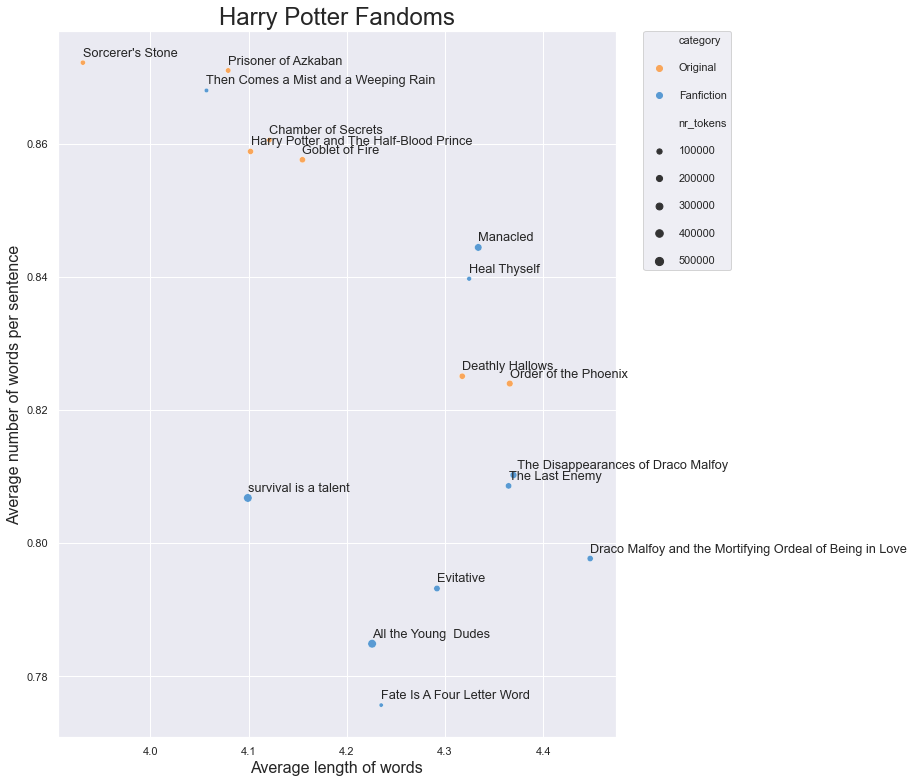

In [7]:

x_axis = 'word_length'
y_axis =  'words_per_sentence'
hue = 'category'
size = 'nr_tokens'

colours = ['#f9a65a','#599ad3']

fig = plt.figure( figsize = ( 10,13 ))

## This line adds spacing in between the lines of the legend 
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=df, x=x_axis, y=y_axis,  
                     hue= hue, size=size , palette = colours )

for index, row in df.iterrows():
    plt.text( row[x_axis], row[y_axis]+ 0.001 , row['title'] , fontsize=12.8)


ax.set_xlabel( 'Average length of words'  , fontsize = 16 )
ax.set_ylabel( 'Average number of words per sentence'  , fontsize = 16 )
ax.set_title( 'Harry Potter Fandoms' , fontsize=24 )


# this next line places the legend outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

plt.savefig( 'scatterplot.png' , dpi=300 )

## Type token ratios

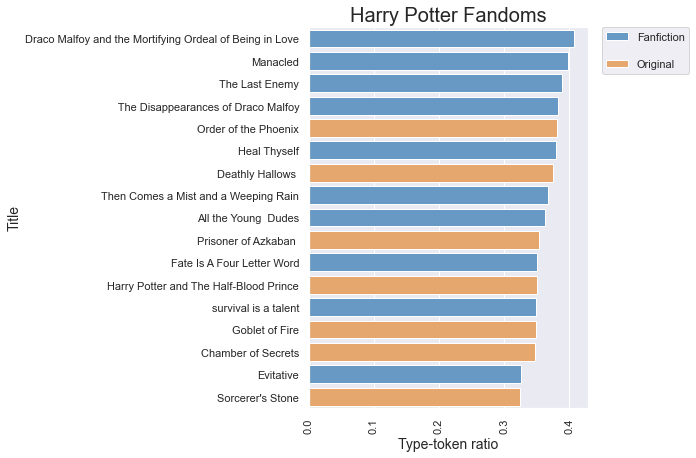

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'ttr'
y_axis = 'title'

colours = ['#599ad3','#f9a65a']

fig = plt.figure( figsize=( 5,7 ) )

df_sorted = df.sort_values(by=[ x_axis] , ascending = False)

graph = sns.barplot( data=df_sorted , x=x_axis, y=y_axis, 
                    hue=hue , dodge=False, palette = colours )

graph.set_title('Harry Potter Fandoms' , size = 20) 
graph.set_xlabel('Type-token ratio' , size = 14) 
graph.set_ylabel('Title' , size = 14 )

plt.xticks(rotation= 90)
# The next line places the legend outside out the plot
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);


plt.show()

In [9]:
def clean_wordlist(words):
    words = [word for word in words if word not in string.punctuation]
    words = [word for word in words if word not in stopwords]
    words = [word for word in words if len(word.strip())>2]
    words = [re.sub(r'([….])|(\')','',word) for word in words]
    words = [word for word in words if re.search(r'\w', word)]
    return words

## Most frequent words and unique words

In [10]:
hp_corpus = ''
fanfiction_corpus = ''

hp_freq = Counter()
fanfiction_freq = Counter()

for file in corpus:
    text = open(file,encoding='utf-8')
    full_text = text.read()
    words = word_tokenize(full_text.lower())
    words = clean_wordlist(words)
    
    if metadata[file] == 'Original':
        hp_freq.update(words)
    else:
        fanfiction_freq.update(words)

The list below indicates the 20 most frequent words in the Harry Potter books. 

In [11]:
for word,count in hp_freq.most_common(20):
    print(f'{word} => {count}')

harry => 18124
said => 14414
nt => 6949
ron => 6274
hermione => 5306
could => 3363
dumbledore => 3324
back => 3216
would => 2677
one => 2609
like => 2370
looked => 2344
know => 2263
around => 2183
got => 2116
hagrid => 2030
professor => 2006
see => 1927
ve => 1912
well => 1911


The list below indicates the 20 most frequent words in the fan fiction.  

In [12]:
for word,count in fanfiction_freq.most_common(20):
    print(f'{word} => {count}')

said => 14502
draco => 14412
harry => 12478
remus => 11771
sirius => 8519
hermione => 7712
back => 7446
like => 7375
would => 6438
one => 6341
could => 6168
know => 5781
james => 5062
eyes => 4705
even => 4553
time => 4431
get => 4431
granger => 4325
going => 4065
still => 3956


Which words in J.K. Rowling's Harry Potter books are NEVER used in works written by fan fiction authors? 

In [13]:
for word,count in hp_freq.most_common(30):
    if word not in fanfiction_freq.keys():
        print(word)

Which words in the works written by fan fiction authors are NEVER used in J.K. Rowling's Harry Potter books ? 

In [14]:
for word,count in fanfiction_freq.most_common(30):
    if word not in hp_freq.keys():
        print(word)

## Dunning’s log likelihood

One of statistical methods that can be used to find such distinctive words is Dunning’s log likelihood. In short, it analyses the distinctiveness of word in one set of texts compared to the texts in a reference corpus, by calculating probabilities based on word frequencies. A good explanation of the fomula can be found on the [wordHoard](https://wordhoard.northwestern.edu/userman/analysis-comparewords.html#loglike) website.

Using the frequencies that have been calculated above, the Dunning log likelihood scores are calculated for all of the words that occur both in corpus1 and corpus2 in the cell below. The actual calculation takes place in a method named `log_likelihood()`. The scores that are calculated are all stored in a dictionary named ll_scores

The formula that is implemented in the log_likelihood method returns a number which can either be positive or negative. A postive score indicates that there is a high probability that the word will be used in the first corpus. A negative probability indicates that occurence of the word is more common in the second corpus. The tokens that are assigned the highest scores, in other words, are also most distincive of the first corpus.

The code below lists the words that are assigned a positive log likelihood score in the first corpus.

See also [TDM tutorial, chapter on Diction](https://cdsleiden.github.io/tdm-tutorial/notebooks/9%20Diction.html)

In [15]:
from tdm import log_likelihood, sorted_by_value, calculate_word_frequencies

corpus1 = []
corpus2 = []

for text in corpus:
    if metadata[text] == 'Original':
        corpus1.append(text)
    else:
        corpus2.append(text)


freq1 = calculate_word_frequencies(corpus1)
total1 = sum(freq1.values())

freq2 = calculate_word_frequencies(corpus2)
total2 = sum(freq2.values())

In [16]:


ll_scores = dict()


for word in freq1.keys():
    if word in freq2.keys():

        ll_score = log_likelihood( freq1[word] , freq2[word] , total1 , total2 )
        ll_scores[word] = ll_score

max = 25
i = 0 
        
for word in sorted_by_value(ll_scores , ascending = False ):
    print( word , ll_scores[word] )
    i += 1
    if i == max: 
        break  

nt 9602.20339434531
Harry 9537.918526917323
Ron 4760.765691885974
said 3946.190824937079
ve 3283.6515667333583
ll 2715.3321786392517
Hagrid 2501.9579640042084
re 2448.497067038552
Dumbledore 2195.8940526028955
Professor 2101.5055852879555
Vernon 1071.6162350838354
Uncle 871.8511761368719
Dudley 858.0528209912209
Mr 853.6218591846778
Weasley 845.2289881223983
ter 757.8595875033838
Fred 749.1258788389937
Mrs 714.0304692197797
yeh 653.5335094360224
Fudge 573.2804835437553
George 556.761465139246
saw 543.483234272197
Bagman 512.327262089131
It 484.1707584078545
Neville 463.8106095786659


In [17]:
max = 25
i = 0 

for word in sorted_by_value(ll_scores ) :
    print( word , ll_scores[word] )
    i += 1
    if i == max:
        break   

Draco -9237.355651688811
Remus -8452.022497985748
She -3145.2878765867954
James -2719.077555585656
Granger -2405.422027731167
Sirius -2181.995291584462
says -1909.4456104471747
Lily -1161.455845268796
Blaise -1112.8335703486814
Peter -824.9753734714009
Mary -722.3527255685318
Grant -667.2555031056046
Pansy -625.0340228446261
asks -580.2965040901895
Her -550.1231507053667
Marlene -509.78652866688157
even -455.8581866546291
war -453.2268429709436
you -421.8333682042112
it -380.83715330868426
Moony -376.59842669703625
actually -373.5440840111663
Don -361.8016478948148
nodded -326.00902919066635
sighed -299.26000162585507


## Separate analysis of Harry Potter books

In [18]:
stopwords.extend(['harry','potter','hermione','ron','i','said','page','j.k.','rowling'])

for book in corpus:
    print('\n'+book)

    file = open(book,encoding='utf-8')
    full_text = file.read()

    all_words = word_tokenize(full_text.lower())
    words = []
    for w in all_words:
        if w not in stopwords and re.search( r'\w' , w ):
            words.append(w.lower())
   
    freq = Counter(words)
    for w,freq in freq.most_common(20):
        print( f'{w} ({freq})')
    


HP/Prisoner%20of%20Azkaban%20.txt
's (1530)
n't (873)
lupin (404)
professor (395)
black (372)
back (348)
could (301)
one (283)
hagrid (263)
'd (252)
snape (246)
've (242)
like (240)
around (239)
looked (235)
would (231)
see (221)
got (220)
'll (211)
get (196)

HP/Chamber%20of%20Secrets.txt
's (1188)
n't (703)
back (278)
could (271)
lockhart (234)
one (219)
malfoy (217)
've (204)
professor (190)
got (188)
would (184)
like (179)
'll (173)
around (171)
weasley (170)
know (161)
hagrid (161)
looked (155)
dumbledore (155)
go (152)

HP/Order%20of%20the%20Phoenix.txt
's (3460)
n't (1555)
back (780)
could (688)
dumbledore (613)
would (610)
sirius (606)
umbridge (558)
professor (553)
looked (537)
know (533)
're (522)
got (507)
like (506)
one (504)
've (498)
though (492)
around (487)
'you (485)
weasley (450)

HP/Harry%20Potter%20and%20The%20Half-Blood%20Prince.txt
's (1969)
n't (1129)
dumbledore (1007)
could (537)
would (521)
back (417)
one (402)
slughorn (395)
snape (372)
know (366)
malfoy (363